In [2]:
import os 
import torch 
import torch.nn as nn
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset
from torchinfo import summary
from torchvision.transforms import transforms
import matplotlib
import matplotlib.pyplot as plt

In [2]:
img_transform = transforms.Compose([
    transforms.ToTensor(),    
])

In [3]:
train_data = datasets.CIFAR10(  # Loads the CIFAR-10 training dataset
    root="./data/train",  # Directory where the dataset is stored
    train=True,  # Specifies that we want the training set
    download=True,  # Downloads the dataset if it is not already available
    transform=img_transform  # Applies the defined transformations to the dataset
)

test_data = datasets.CIFAR10(  # Loads the CIFAR-10 test dataset
    root="./data/test",  # Directory where the dataset is stored
    train=False,  # Specifies that we want the test set
    download=True,  # Downloads the dataset if it is not already available
    transform=img_transform  # Applies the same transformations as for the training set
)

100%|██████████| 170498071/170498071 [00:03<00:00, 54638381.44it/s]


Extracting ./data/train/cifar-10-python.tar.gz to ./data/train


100%|██████████| 170498071/170498071 [00:04<00:00, 38132841.84it/s]


Extracting ./data/test/cifar-10-python.tar.gz to ./data/test


In [28]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)


In [37]:
(next(iter(train_loader)))[0].shape

torch.Size([32, 3, 32, 32])

In [39]:
image, label = next(iter(train_loader))

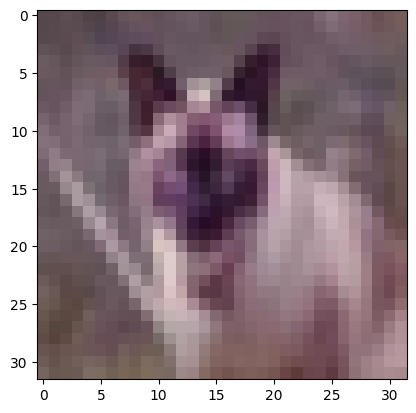

In [41]:
plt.imshow(image[0].permute(1, 2, 0))

In [167]:
from gan_model import ConditionalGenerator

generator = ConditionalGenerator()

Loaded checkpoint
Generating a dog


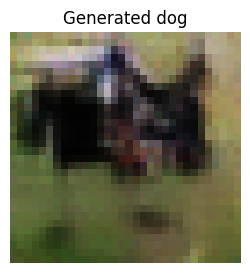

In [165]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create generator
generator = ConditionalGenerator(latent_dim=100, num_classes=10)

# Load checkpoint if available (otherwise will use untrained weights)
checkpoint_path = 'checkpoints/cgan_generator_epoch100.pth'  # Change to your path
try:
    generator.load_state_dict(torch.load(checkpoint_path, map_location=device))
    print("Loaded checkpoint")
except Exception as e:
    print(f"No checkpoint loaded: {e}")
    print("Using untrained model")

generator.to(device)
generator.eval()

# CIFAR-10 class names
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                 'dog', 'frog', 'horse', 'ship', 'truck']

# Choose a class (0-9)
class_idx = 5  # Generate a cat (change to any number 0-9)
print(f"Generating a {cifar_classes[class_idx]}")

# Generate one image
with torch.no_grad():
    # Create random noise
    z = torch.randn(1, 100, device=device)
    
    # Create class label
    label = torch.tensor([class_idx], device=device)
    
    # Generate image
    fake_image = generator(z, label)
    
    # Convert from [-1,1] to [0,1] range
    fake_image = fake_image * 0.5 + 0.5

# Display image
plt.figure(figsize=(3, 3))
plt.imshow(fake_image[0].cpu().permute(1, 2, 0))
plt.title(f"Generated {cifar_classes[class_idx]}")
plt.axis('off')
plt.show()

In [ ]:
from huggingface_hub import HfApi

api = HfApi()

# Create the repository first
api.create_repo(
    repo_id="sohumgautam/gan-cifar10",
    repo_type="model",
    private=False
)

In [172]:
# Upload the file
api.upload_file(
    path_or_fileobj="checkpoints/cgan_generator_epoch100.pth",
    path_in_repo="checkpoints/cgan_generator_epoch100.pth",
    repo_id="sohumgautam/gan-cifar10",
    commit_message="Add GAN model"
)

RepositoryNotFoundError: 401 Client Error. (Request ID: Root=1-67e5d0bc-3de53b3a5b267b0c7756034d;d7f61580-cd12-45bb-b8b2-251515aa88b6)

Repository Not Found for url: https://huggingface.co/api/models/sohumgautam/gan-cifar10/preupload/main.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.
Invalid username or password.
Note: Creating a commit assumes that the repo already exists on the Huggingface Hub. Please use `create_repo` if it's not the case.

In [ ]:
model = generator.from_pretrained("sohumgautam/gan-cifar10")
